In [2]:
#Get dependencies
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine, Column, Integer, String, Float, Date, MetaData
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.ext.automap import automap_base
Base = declarative_base()
from sqlalchemy.orm import Session
from sqlalchemy import func
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [3]:
#Connect to SQLite DB
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [4]:
# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [5]:
#Map station class
Station = Base.classes.station

In [6]:
#Map measurement class
Measurement = Base.classes.measurement

In [7]:
#Initialize session
session = Session(engine)

In [8]:
#Precipitation Analysis
#Get year ago date
year_ago = datetime.today() - timedelta(days=365) 
#Filter results for last year
precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > year_ago).all()
precip_df = pd.DataFrame(precipitation).set_index('date')
precip_df.head()


,prcp
date,
2017-04-24,0.0
2017-04-25,0.0
2017-04-26,0.0
2017-04-27,0.0
2017-04-28,0.0


In [9]:
#Get x, y for plot
x = precip_df.index.tolist()
y = precip_df['prcp'].tolist()


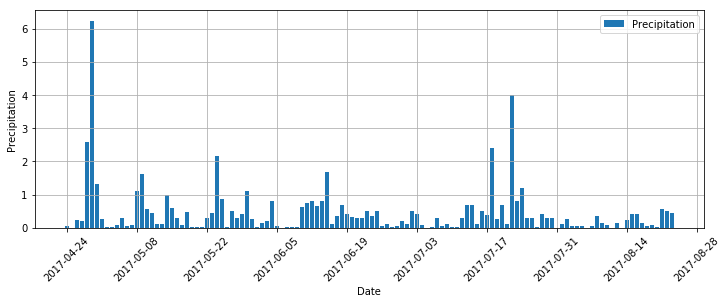

In [10]:
#Plot chart
fig, ax = plt.subplots(1, 1, figsize=(12,4))
ax.bar(x, y)
ax.set_xlabel("Date")
ax.set_ylabel("Precipitation")
#ax.set_facecolor('#e3e6ea')
plt.xticks(rotation=45)
plt.legend(['Precipitation'])
plt.grid()
plt.show()


In [11]:
#Summary statistics for precipitation data
print('Precipitation summary statistics: ')
precip_df.columns = ['precipitation']
precip_df.describe()

Precipitation summary statistics: 


,precipitation
count,635.000000
mean,0.148441
std,0.403357
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,6.250000


In [12]:
#Station Analysis
#Total number of stations
stations_count = session.query(Station).count()
print(f'Total number of Stations: {stations_count}')

Total number of Stations: 9


In [13]:
#Most active Stations
stations = session.query(Station.station, func.count(Measurement.tobs)).filter(Station.station == Measurement.station).group_by(Station.station).order_by(func.count(Measurement.tobs).desc()).all()
stations

print(f'The station {stations[0][0]} has the highest number of observations {stations[0][1]} ')

The station USC00519281 has the highest number of observations 2772 


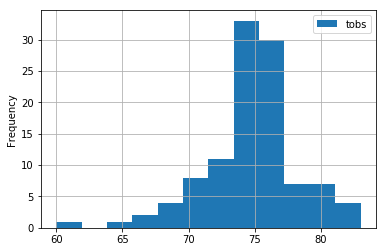

In [15]:
#Temperature Analysis
temperature = session.query(Measurement.date, Measurement.tobs, Station.station).filter((Station.station == Measurement.station) & (Measurement.date > year_ago) & (Station.station == stations[0][0])).all()
tmp_df = pd.DataFrame(temperature).set_index('date')
tmp_df

tmp_df.plot.hist(bins=12)
plt.grid()
plt.show()

In [16]:

#Function for calculating min, max, avg temps based on input dates
def calc_temps(start_dt, end_dt):
    min_temp = session.query(func.min(Measurement.tobs)).filter((Measurement.date >= start_dt) & (Measurement.date < end_dt)).all()
    max_temp = session.query(func.max(Measurement.tobs)).filter((Measurement.date >= start_dt) & (Measurement.date < end_dt)).all()
    avg_temp = session.query(func.avg(Measurement.tobs)).filter((Measurement.date >= start_dt) & (Measurement.date < end_dt)).all()
    return [min_temp[0][0], max_temp[0][0], avg_temp[0][0]]



In [17]:
temp_list_df = pd.DataFrame(calc_temps('2017-01-01', '2017-02-01'))
temp_list_df.columns = ['temp']
temp_list_df

,temp
0,60.000000
1,80.000000
2,69.435294


In [18]:
#Calculate error
yerror = temp_list_df['temp'][1] - temp_list_df['temp'][0]


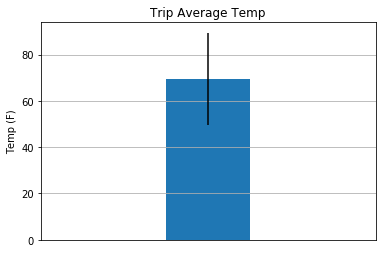

In [23]:
#Plot
x = [1]
y = [temp_list_df['temp'][2]]
fig, ax = plt.subplots(1, 1)
ax.bar(x, y, width=0.1, yerr=yerror)
ax.set_xlim(0.8, 1.2)
ax.set_ylabel('Temp (F)')
ax.set_xticks([])
plt.grid()
plt.title('Trip Average Temp')
plt.show()